# Multiple KNN with MLFlow

This notebook predicts the quality of wine as a function of the rest of the attributes using KNN with MLFlow and compares several models to determine the number of neighbors that maximizes accuracy for this dataset.  

Author: Daniel Marranzini


In [ ]:
def train(n_neighbors=5):
    import os
    import warnings
    import sys

    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier

    import mlflow
    import mlflow.sklearn

    import logging
    logging.basicConfig(level=logging.WARN)
    logger = logging.getLogger(__name__)

    warnings.filterwarnings("ignore")
    np.random.seed(24)

    # Read the wine-quality csv file from the URL
    csv_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
    data = pd.read_csv(csv_url, sep=';')

    train, test = train_test_split(data)

    # The predicted column is "quality" which is a scalar from [3, 9]
    train_x = train.drop(["quality"], axis=1)
    test_x = test.drop(["quality"], axis=1)
    train_y = train[["quality"]]
    test_y = test[["quality"]]
    
    # Scale all the features for KNN so they can be uniformly evaluated
    scaler = StandardScaler()
    scaler.fit(train_x)
    
    X_train = scaler.transform(train_x)
    X_test = scaler.transform(test_x)

   
    with mlflow.start_run():
        # Execute KNN
        classifier = KNeighborsClassifier(n_neighbors)
        classifier.fit(train_x, train_y)

        # Evaluate Metrics
        pred = classifier.predict(test_x)
        accuracy = accuracy_score(test_y, pred)

        # Print out metrics
        print("KNeighborsClassifier (n_neighbors): " + str(n_neighbors))
        print("Accuracy: {:.2%}".format(accuracy))
        print("--------------------")

        # Log parameter, metrics, and model to MLflow
        mlflow.log_param("n_neighbors", n_neighbors)
        mlflow.log_metric("Accuracy", accuracy)

        mlflow.sklearn.log_model(classifier, "model")

In [ ]:
for n_neighbors in range(2,11):
    train(n_neighbors)

KNeighborsClassifier (n_neighbors): 2
Accuracy: 49.75%
--------------------
KNeighborsClassifier (n_neighbors): 3
Accuracy: 48.50%
--------------------
KNeighborsClassifier (n_neighbors): 4
Accuracy: 46.00%
--------------------
KNeighborsClassifier (n_neighbors): 5
Accuracy: 45.75%
--------------------
KNeighborsClassifier (n_neighbors): 6
Accuracy: 47.75%
--------------------
KNeighborsClassifier (n_neighbors): 7
Accuracy: 47.75%
--------------------
KNeighborsClassifier (n_neighbors): 8
Accuracy: 49.50%
--------------------
KNeighborsClassifier (n_neighbors): 9
Accuracy: 45.75%
--------------------
KNeighborsClassifier (n_neighbors): 10
Accuracy: 47.00%
--------------------


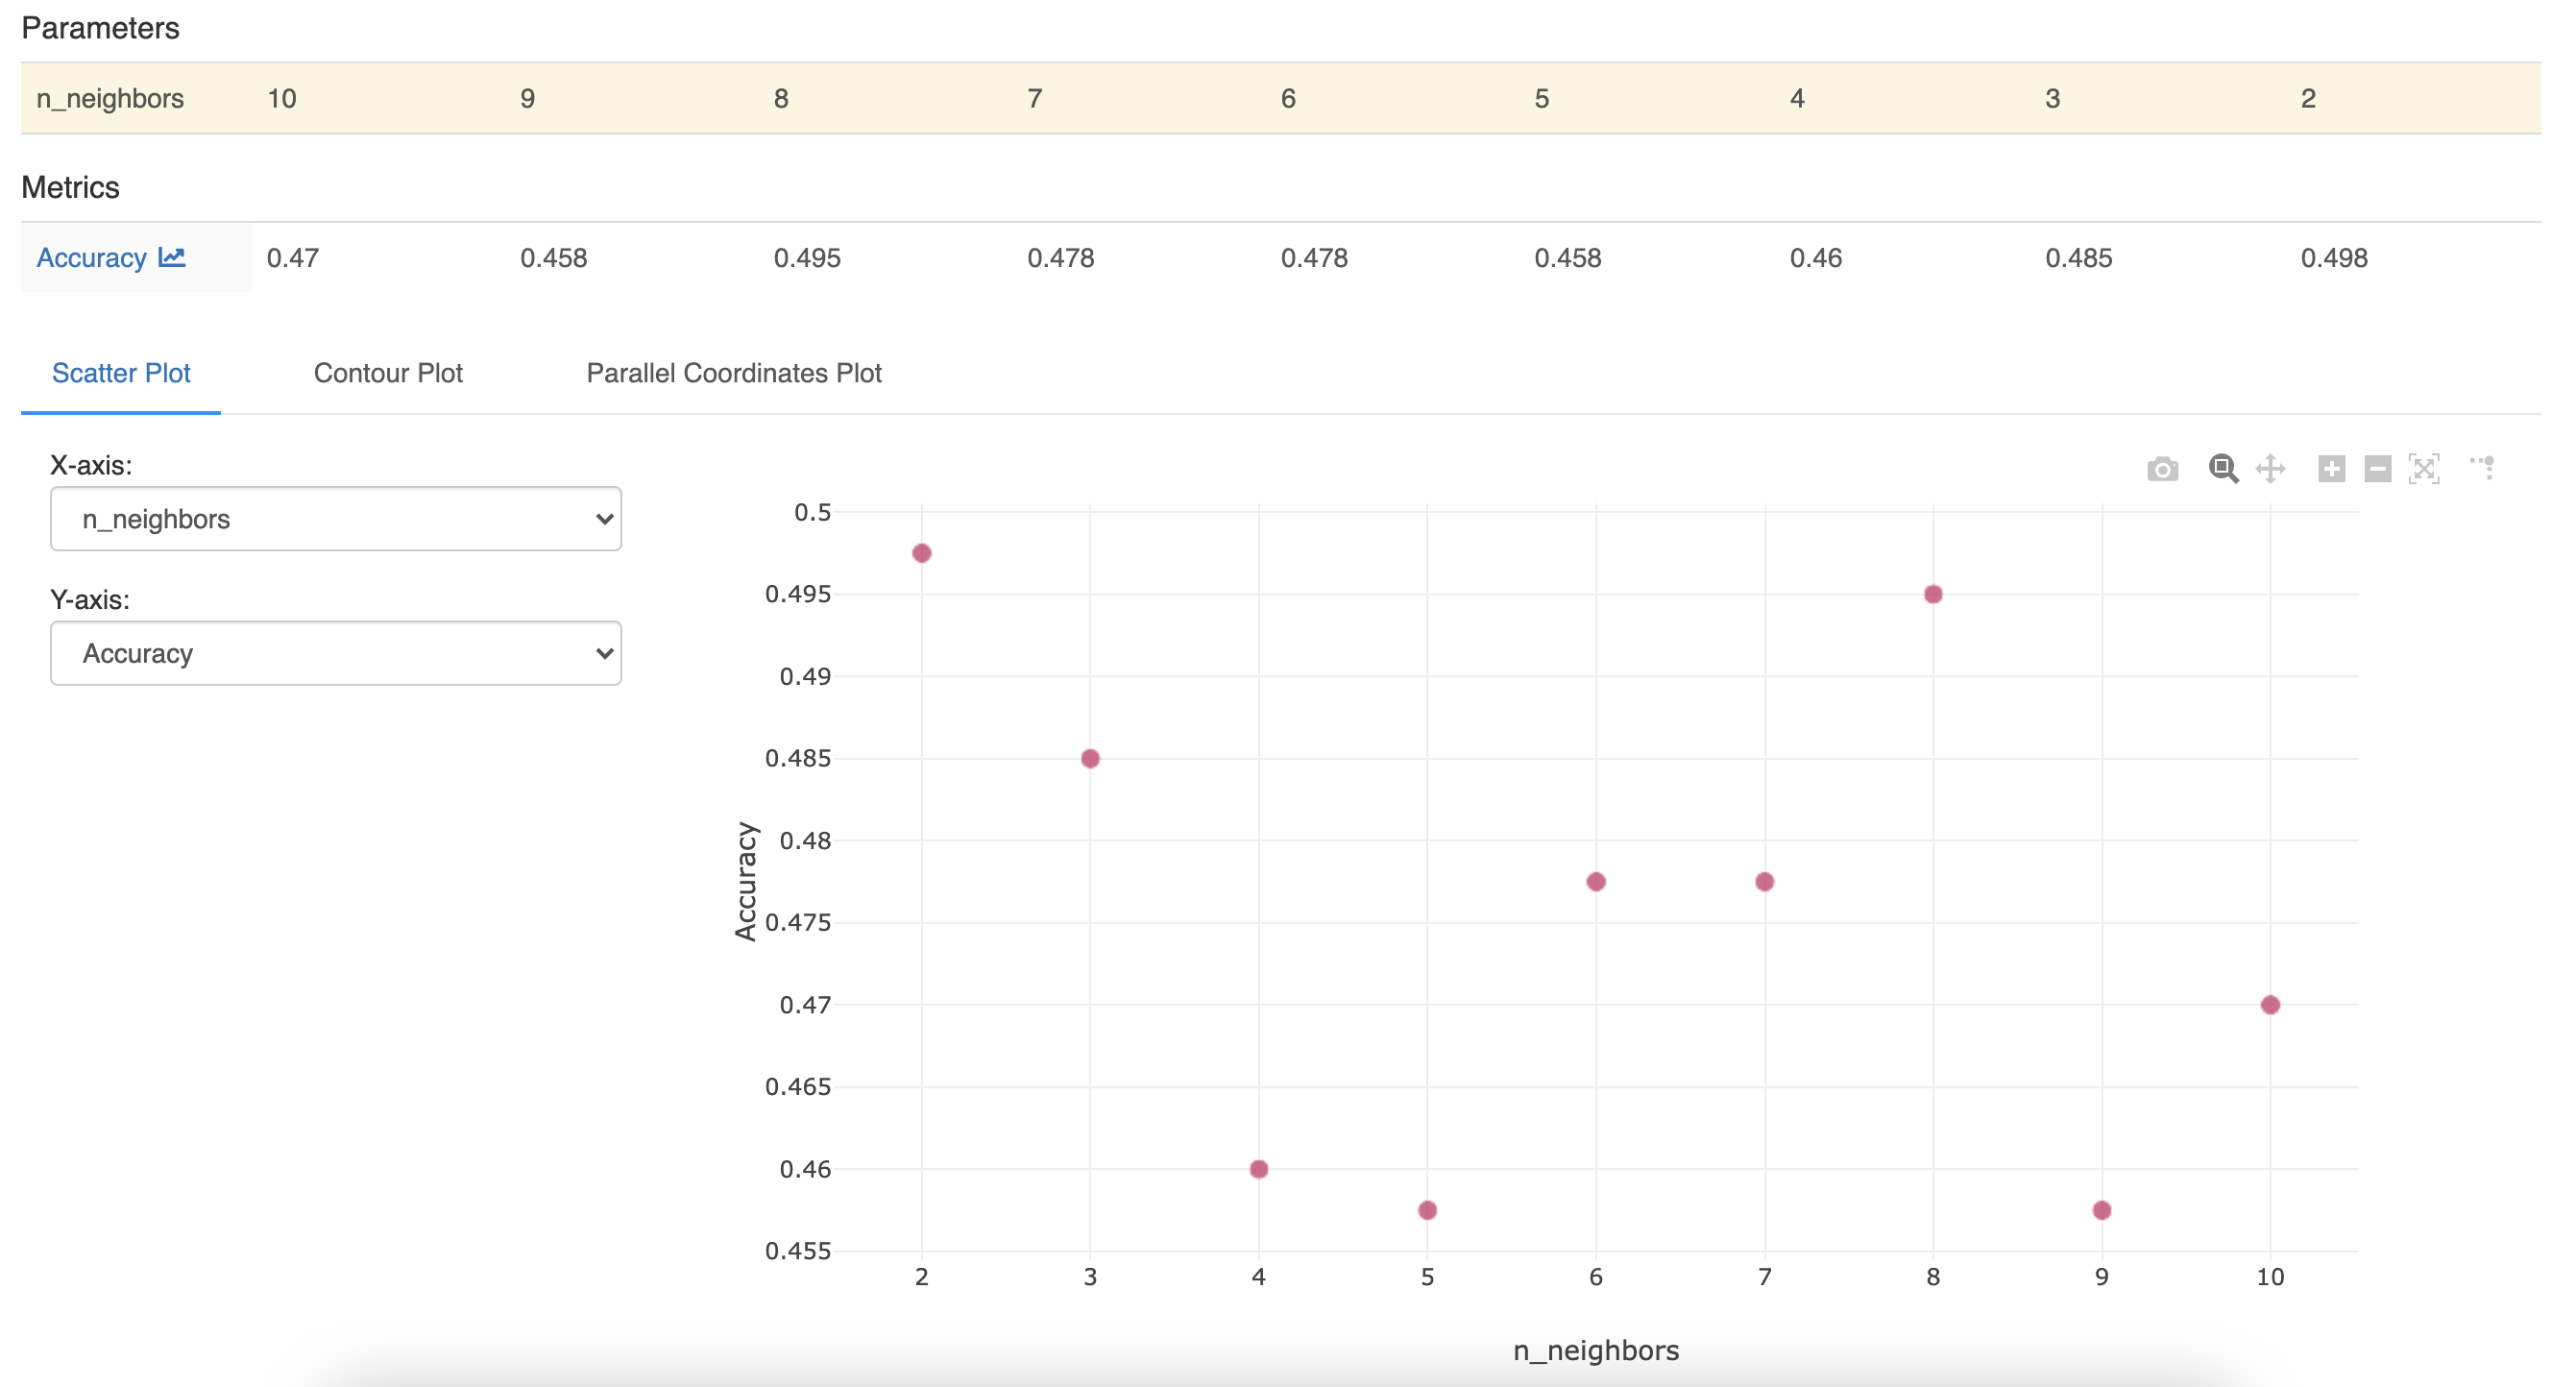

The number of neighbors that maximizes accuracy is 2, with 8 being very close behind.